In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from lib.dataprocess import get_us_macro_data_for_rbcdemo,make_detrended_rbc_sample
from lib.rbcsim import RBC_model

In [3]:
%%time

df = get_us_macro_data_for_rbcdemo(refresh=False)

CPU times: total: 62.5 ms
Wall time: 54.1 ms


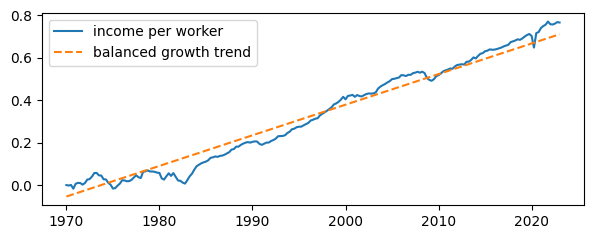

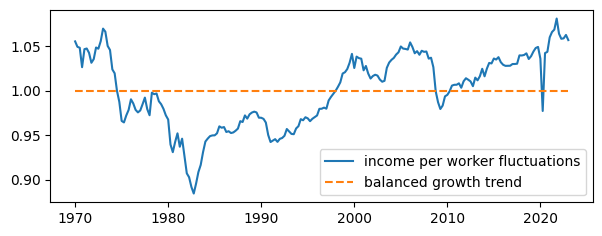

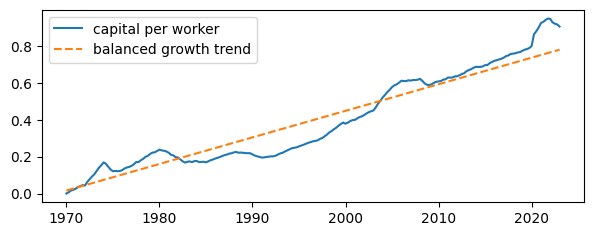

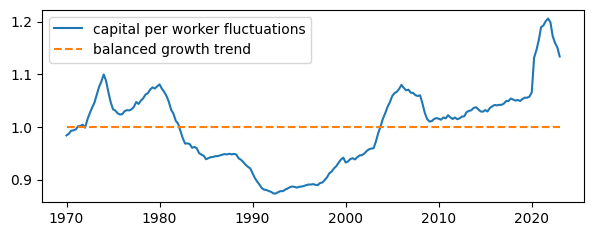

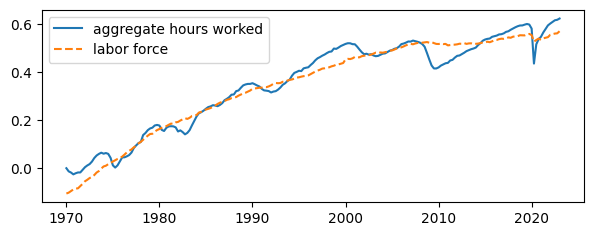

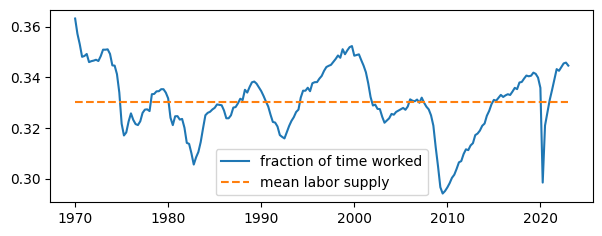

In [4]:
alph = 1/3

df_samp = make_detrended_rbc_sample(get_us_macro_data_for_rbcdemo(),alph)


plt.figure(figsize=(7,2.5))
plt.plot(df_samp.date,np.log(df_samp.y/df_samp.y.iloc[0]),label='income per worker')
plt.plot(df_samp.date,np.log(df_samp.y_trend/df_samp.y.iloc[0]),'--',label='balanced growth trend')
plt.legend()
plt.savefig('out/Yperworker_US_trend.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=(7,2.5))
plt.plot(df_samp.date,df_samp.y_stat,label='income per worker fluctuations')
plt.plot([df_samp.date.min(),df_samp.date.max()],[1,1],'--',label='balanced growth trend')
plt.legend()
plt.savefig('out/Yperworker_US_flux.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=(7,2.5))
plt.plot(df_samp.date,np.log(df_samp.k/df_samp.k.iloc[0]),label='capital per worker')
plt.plot(df_samp.date,np.log(df_samp.k_trend/df_samp.k.iloc[0]),'--',label='balanced growth trend')
plt.legend()
plt.savefig('out/Kperworker_US_trend.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=(7,2.5))
plt.plot(df_samp.date,df_samp.k_stat,label='capital per worker fluctuations')
plt.plot([df_samp.date.min(),df_samp.date.max()],[1,1],'--',label='balanced growth trend')
plt.legend()
plt.savefig('out/Kperworker_US_flux.pdf',bbox_inches='tight')
plt.show()


plt.figure(figsize=(7,2.5))
plt.plot(df_samp.date,np.log(df_samp.H/df_samp.H.iloc[0]),label='aggregate hours worked')
plt.plot(df_samp.date,np.log((.9)*df_samp.L/df_samp.L.iloc[0]),'--',label='labor force')
plt.legend()
plt.savefig('out/HandL_US_trend.pdf',bbox_inches='tight')
plt.show()


plt.figure(figsize=(7,2.5))
plt.plot(df_samp.date,df_samp.l,label='fraction of time worked')
plt.plot([df_samp.date.min(),df_samp.date.max()],[df_samp.l.mean()]*2,'--',label='mean labor supply')
plt.legend()
plt.savefig('out/l_US_trend.pdf',bbox_inches='tight')
plt.show()

log_y_stat    0.041864
log_k_stat    0.074752
log_l_stat    0.039684
log_A_stat    0.029454
dtype: float64

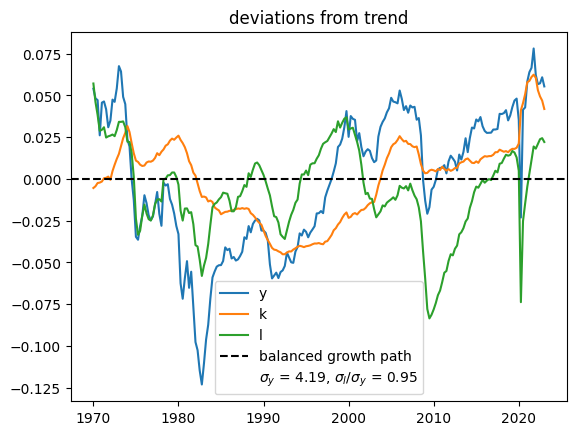

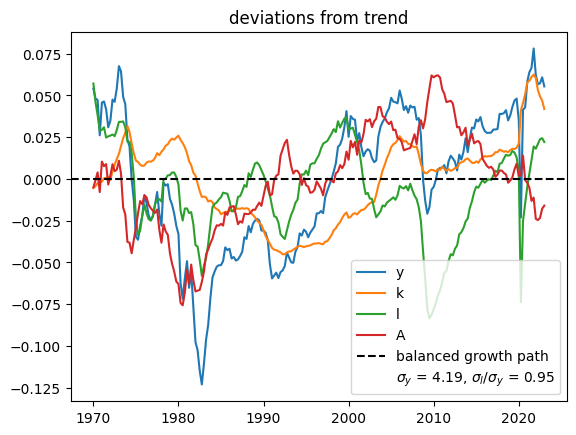

In [5]:





sigmas_data = df_samp[['log_y_stat','log_k_stat','log_l_stat','log_A_stat']].std()

display(sigmas_data)



plt.figure()
plt.title('deviations from trend')
plt.plot(df_samp.date,np.log(df_samp.y_stat),label='y')
plt.plot(df_samp.date,alph*np.log(df_samp.k_stat),label='k')
plt.plot(df_samp.date,(1-alph)*np.log(3*df_samp.l),label='l')
plt.axhline(0,linestyle='--',color='k',label='balanced growth path')
plt.plot([], [], ' ', label=f"$\\sigma_y$ = {100*sigmas_data['log_y_stat']:.2f}, $\\sigma_l/\\sigma_y$ = {sigmas_data['log_l_stat']/sigmas_data['log_y_stat']:.2f}")

plt.legend()
plt.savefig('out/US_data_all3.pdf')
plt.show()


plt.figure()
plt.title('deviations from trend')
plt.plot(df_samp.date,np.log(df_samp.y_stat),label='y')
plt.plot(df_samp.date,alph*np.log(df_samp.k_stat),label='k')
plt.plot(df_samp.date,(1-alph)*np.log(3*df_samp.l),label='l')
plt.plot(df_samp.date,np.log(df_samp.A_stat) - np.log(np.mean(df_samp.A_stat)),label='A')
plt.axhline(0,linestyle='--',color='k',label='balanced growth path')
plt.plot([], [], ' ', label=f"$\\sigma_y$ = {100*sigmas_data['log_y_stat']:.2f}, $\\sigma_l/\\sigma_y$ = {sigmas_data['log_l_stat']/sigmas_data['log_y_stat']:.2f}")
plt.legend()
plt.savefig('out/US_data_all3_andA.pdf')
plt.show()

In [6]:
simnum = 100

Sim: 101


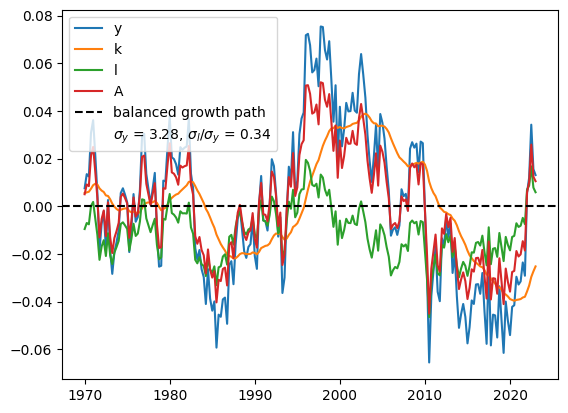

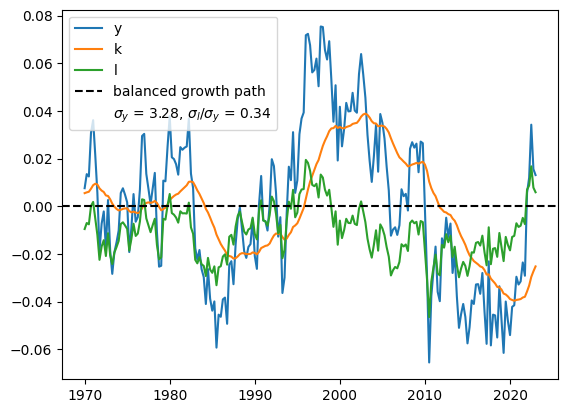

In [7]:
params_dict = dict(delt = .015,
                   sbar = .2,
                   alph = 1/3,
                   aak = .95,
                   aaA = .08,
                   rho = .95,
                   sig = .099)

model_a = RBC_model(get_us_macro_data_for_rbcdemo(),params_dict)

df_sim = model_a.simulate_model()


#sigmas = df_sim[['log_y_stat','log_k_stat','log_l','log_A_stat']].std()
#display(sigmas)
#print(sigmas['log_y_stat'])
#print(sigmas['log_l']/sigmas['log_y_stat'])

simnum += 1
print(f'Sim: {simnum}')
plt.figure()
plt.plot(df_sim.date,np.log(df_sim.y_stat),label='y')
plt.plot(df_sim.date,np.log(df_sim.k_stat),label='k')
plt.plot(df_sim.date,np.log(3*df_sim.l),label='l')
plt.plot(df_sim.date,np.log(df_sim.A_stat) ,label='A')
plt.axhline(0,linestyle='--',color='k',label='balanced growth path')
plt.plot([], [], ' ', label=f"$\\sigma_y$ = {100*model_a.get_sigma_sim('y_stat'):.2f}, $\\sigma_l/\\sigma_y$ = {model_a.get_sigma_sim('l')/model_a.get_sigma_sim('y_stat'):.2f}")
plt.legend()
plt.savefig(f'out/US_sim{simnum}_all3_plusA.pdf',bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(df_sim.date,np.log(df_sim.y_stat),label='y')
plt.plot(df_sim.date,np.log(df_sim.k_stat),label='k')
plt.plot(df_sim.date,np.log(3*df_sim.l),label='l')
#plt.plot(df_sim.date,np.log(df_sim.A_stat) ,label='A')
plt.axhline(0,linestyle='--',color='k',label='balanced growth path')
plt.plot([], [], ' ', label=f"$\\sigma_y$ = {100*model_a.get_sigma_sim('y_stat'):.2f}, $\\sigma_l/\\sigma_y$ = {model_a.get_sigma_sim('l')/model_a.get_sigma_sim('y_stat'):.2f}")
plt.legend()
plt.savefig(f'out/US_sim{simnum}_all3.pdf',bbox_inches='tight')
plt.show()


In [8]:
display(model_a.sim_deviations_chart())
print(100*model_a.get_sigma_sim('y_stat'))
print(model_a.get_sigma_sim('l')/model_a.get_sigma_sim('y_stat'))

display(model_a.data_deviations_chart())
print(100*model_a.get_sigma_data('y_stat'))
print(model_a.get_sigma_data('l')/model_a.get_sigma_data('y_stat'))


alt.LayerChart(...)

3.2771867113218223
0.33647811421269125


alt.LayerChart(...)

4.186441541028573
0.9479105270120876


In [9]:
model_a.plot_data_variable('A_stat',with_trend=True)\
& model_a.plot_sim_variable('A_stat',with_trend=True)

alt.VConcatChart(...)

<Axes: >

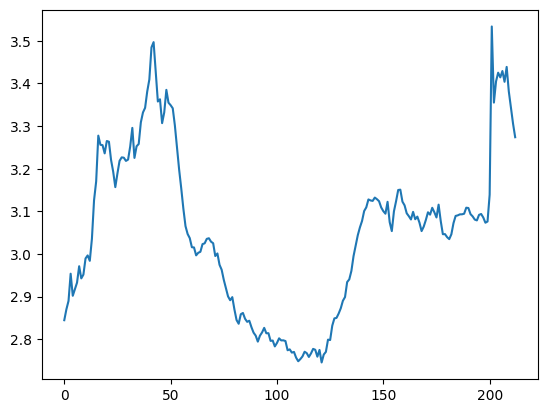

In [10]:
(df_samp['K']/df_samp['Y']).plot()

<Axes: >

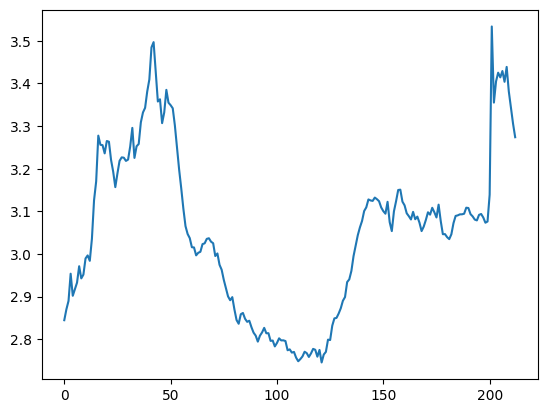

In [11]:
(model_a.df_in['k']/model_a.df_in['y']).plot()

In [12]:
model_a.df_in['y'].mean()

np.float64(9.597955396277884e-05)

In [13]:
model_a.kbar

np.float64(0.00029334607859537207)

In [24]:
.2/(model_a.g_y + .015*4)

np.float64(2.6863131418590958)

In [25]:
.2/(.015*4)

3.3333333333333335

<Axes: >

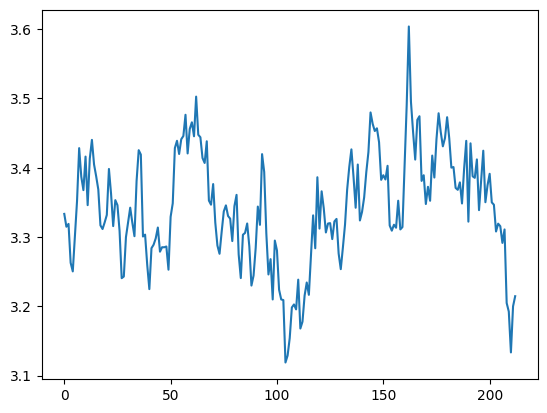

In [10]:
((model_a.last_df_sim['k'])/(model_a.periodicity*model_a.last_df_sim['y'])).plot()

In [11]:
model_a.last_df_sim

KeyError: 'K'

In [10]:
model_a.df_raw

,date,PK,N,PY,P,H,L,unrate,log_PK
0,1925-01-01,261770.0,NaN,NaN,NaN,NaN,NaN,NaN,12.475222
1,1926-01-01,270574.0,NaN,NaN,NaN,NaN,NaN,NaN,12.508301
2,1927-01-01,277346.0,NaN,NaN,NaN,NaN,NaN,NaN,12.533021
3,1928-01-01,289389.0,NaN,NaN,NaN,NaN,NaN,NaN,12.575527
4,1929-01-01,294389.0,NaN,NaN,NaN,NaN,NaN,NaN,12.592657
...,...,...,...,...,...,...,...,...,...
331,2023-07-01,NaN,335430.0,27967.697,122.768,105.473,156252000.0,3.700000,NaN
332,2023-10-01,NaN,335923.0,28296.967,123.241,105.535,156477200.0,3.733333,NaN
333,2024-01-01,NaN,336308.0,28624.069,124.163,105.696,156182300.0,3.800000,NaN
334,2024-04-01,NaN,336692.0,29016.714,124.943,105.936,156384700.0,4.000000,NaN


In [13]:
np.exp(model_a.last_df_sim['k']-model_a.last_df_sim['y'])

0      2.521868
1      2.521626
2      2.522572
3      2.521245
4      2.524656
         ...   
208    2.454954
209    2.455287
210    2.453736
211    2.457438
212    2.456825
Length: 213, dtype: float64

In [24]:
model_a.params['delt']

0.015

In [27]:
model_a.psi

np.float64(1.6906879886016533)

In [25]:
model_a.last_df_sim['c'] = model_a.last_df_sim['y'] + model_a.last_df_sim['k']*(1 - model_a.params['delt']) - model_a.last_df_sim['k'].shift(-1)

<Axes: >

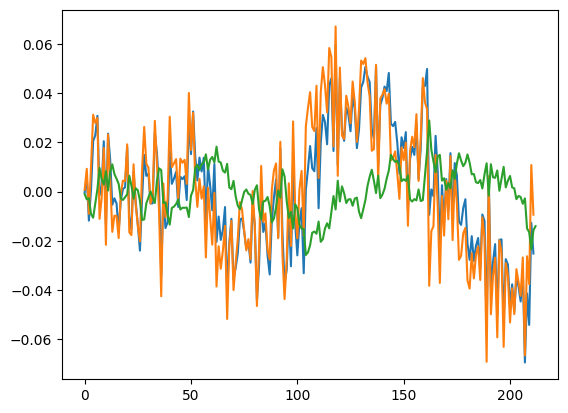

In [36]:
((np.log(model_a.last_df_sim['c']) + model_a.psi*np.log(1-model_a.last_df_sim['l'])) - (np.log(model_a.last_df_sim['c']) + model_a.psi*np.log(1-model_a.last_df_sim['l'])).mean()).plot()

(np.log(model_a.last_df_sim['c'])-np.log(model_a.last_df_sim['c']).mean()).plot()

(model_a.psi*np.log(1-model_a.last_df_sim['l'])-(model_a.psi*np.log(1-model_a.last_df_sim['l'])).mean()).plot()

In [22]:
model_a.last_df_sim['y_trend'] = model_a.last_df_sim['y']*(1+model_a.g_y/4)**(model_a.last_df_sim.index - model_a.last_df_sim.index[0])
model_a.last_df_sim['k_trend'] = model_a.last_df_sim['k']*(1+model_a.g_y/4)**(model_a.last_df_sim.index - model_a.last_df_sim.index[0])

<Axes: >

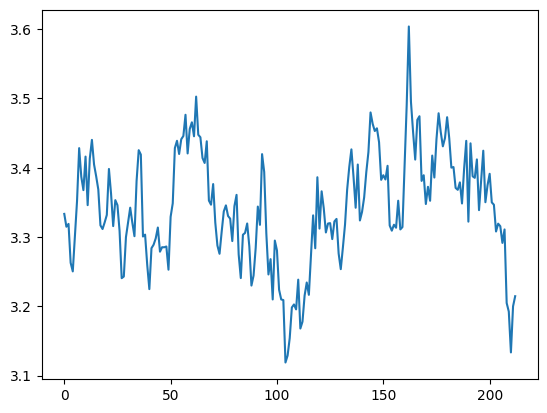

In [23]:
(model_a.last_df_sim['k_trend']/(model_a.last_df_sim['y_trend']*4)).plot()

In [22]:
model_a.last_df_sim['y_trend']

0      0.075000
1      0.073997
2      0.075809
3      0.076234
4      0.077944
         ...   
208    0.176587
209    0.175394
210    0.179501
211    0.182686
212    0.179659
Name: y_trend, Length: 213, dtype: float64

In [32]:
import altair as alt
to_chart_df = model_a.df_in[['date','y_stat']].copy()
to_chart_df['y_stat'] = np.log(to_chart_df['y_stat'])
test_chart = alt.Chart(to_chart_df,width=600,height=240)
test_chart.mark_line().encode(x='date:T',y=alt.Y('y_stat:Q',scale=alt.Scale(zero=False))) + test_chart.mark_rule(strokeDash=[4, 4]).encode(y=alt.datum(0))

alt.LayerChart(...)

In [42]:
import altair as alt
to_chart_df = model_a.df_in[['date','y_stat']].copy()

to_chart_df['trend'] = (to_chart_df.index-to_chart_df.index[0])*model_a.g_y/4
to_chart_df['y_stat'] = np.log(to_chart_df['y_stat']) + to_chart_df['trend']

test_chart = alt.Chart(to_chart_df,width=600,height=240)
test_chart.mark_line().encode(x='date:T',
                              y=alt.Y('y_stat:Q',scale=alt.Scale(zero=False))) + test_chart.mark_line(color='black',strokeDash=[4, 4]).encode(x='date:T',
                                                                                                                                y='trend:Q',
                                                                                                                                )

alt.LayerChart(...)

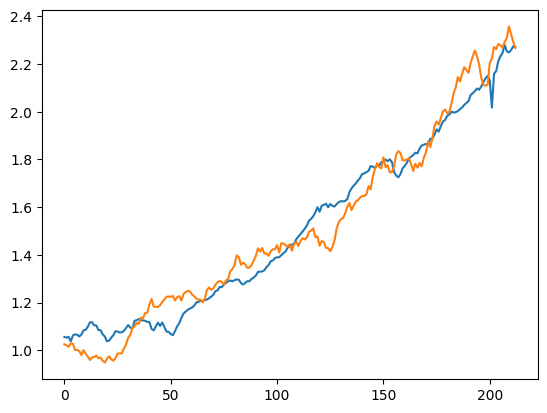

In [22]:
plt.figure()
plt.plot(model_a.df_in['y_stat']*(1+model_a.g_y/model_a.periodicity)**(model_a.df_in.index - model_a.df_in.index[0]))
plt.plot(model_a.last_df_sim['y_stat']*(1+model_a.g_y/model_a.periodicity)**(model_a.last_df_sim.index - model_a.last_df_sim.index[0]))

<Axes: >

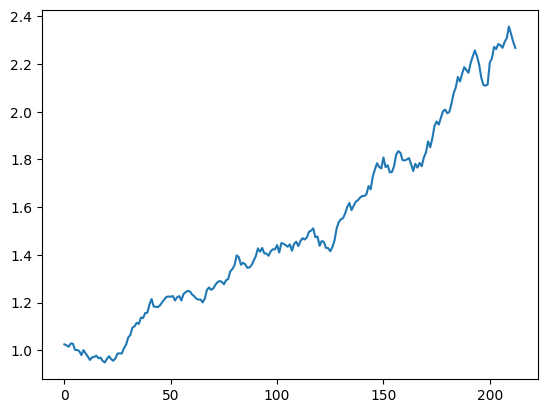

In [10]:
make_detrended_rbc_sample(model_a.df_in,1/3)

KeyError: 'PY'

In [11]:
df_samp

,date,PK,N,PY,P,H,L,unrate,log_PK,Y,...,y_stat,k_stat,y_trend,k_trend,yhat_stat,A_stat,log_y_stat,log_k_stat,log_A_stat,log_l_stat
0,1970-01-01,2.990473e+06,204086.0,1051.200,19.832,56.592,78955160.0,4.166667,14.910942,5300.524405,...,1.055486,0.983873,0.000064,0.194113,0.506260,2.084871,0.054001,-0.016258,0.734707,0.095245
1,1970-04-01,3.063695e+06,204721.0,1067.375,20.108,55.857,79243430.0,4.766667,14.935132,5308.210662,...,1.049380,0.986946,0.000064,0.194814,0.501169,2.093863,0.048199,-0.013140,0.739010,0.078528
2,1970-07-01,3.138709e+06,205419.0,1086.059,20.273,55.583,79766720.0,5.166667,14.959322,5357.169634,...,1.048323,0.992717,0.000064,0.195518,0.498309,2.103760,0.047192,-0.007310,0.743726,0.067029
3,1970-10-01,3.215561e+06,206130.0,1088.608,20.541,55.162,80302140.0,5.833333,14.983512,5299.683560,...,1.026451,0.993472,0.000064,0.196224,0.493709,2.079061,0.026107,-0.006549,0.731916,0.052736
4,1971-01-01,3.294294e+06,206763.0,1135.156,20.853,55.417,80594660.0,5.933333,15.007702,5443.610032,...,1.046718,0.995334,0.000065,0.196933,0.494339,2.117411,0.045660,-0.004676,0.750194,0.053712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2022-01-01,8.670911e+07,332991.0,25215.491,115.119,103.333,152847700.0,3.800000,18.278070,21903.848192,...,1.064146,1.199033,0.000135,0.410987,0.520085,2.046101,0.062173,0.181515,0.715936,0.036773
209,2022-04-01,8.725966e+07,333320.0,25805.791,117.731,104.026,153231800.0,3.633333,18.284399,21919.282942,...,1.058403,1.172680,0.000135,0.412472,0.517685,2.044492,0.056761,0.159292,0.715149,0.040947
210,2022-07-01,8.781370e+07,333762.0,26272.011,119.057,104.748,153637600.0,3.533333,18.290728,22066.750380,...,1.058884,1.159710,0.000136,0.413962,0.517240,2.047179,0.057215,0.148170,0.716463,0.045219
211,2022-10-01,8.837125e+07,334201.0,26734.277,120.157,104.953,153791500.0,3.566667,18.297057,22249.454464,...,1.062743,1.151074,0.000136,0.415457,0.516281,2.058456,0.060853,0.140695,0.721956,0.046173


In [ ]:
df_sim['k_stat'].mean()

In [ ]:
import altair as alt

vars_to_include = ['y_stat',
                   'k_stat',
                   #'A_stat'
                  ]
df_sim_altair = df_sim[['date','l'] + vars_to_include].copy()

df_sim_altair['l'] = np.log(3*df_sim_altair['l'])
for var in vars_to_include:
    df_sim_altair[var] = np.log(df_sim_altair[var])

test_chart = alt.Chart(df_sim_altair.melt(id_vars='date', value_vars=['l'] + vars_to_include,value_name='log deviations from BGP'),width=800,height=500)

test_chart.mark_line().encode(x='date:T',y='log deviations from BGP:Q',color=alt.Color('variable:N',sort='descending'),)\
        + test_chart.mark_rule(strokeDash=[4, 4]).encode(y=alt.datum(0))

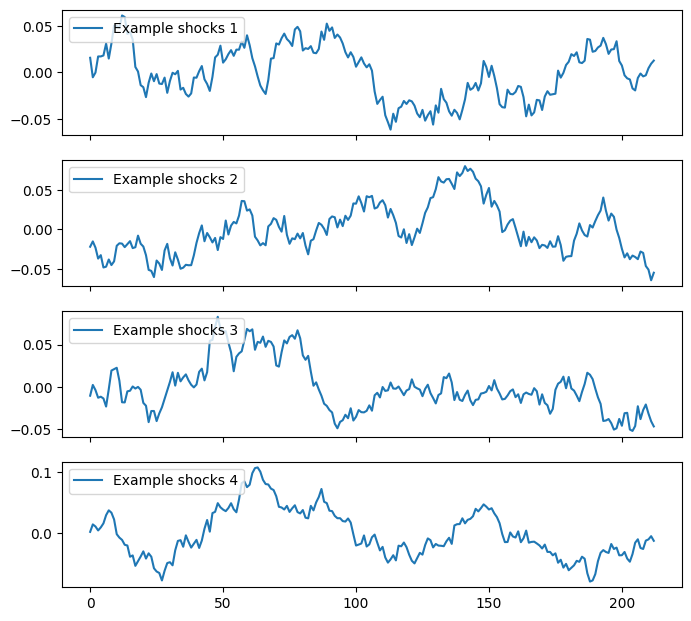

In [10]:
f,ax = plt.subplots(4,1,figsize=(8,7.5),sharex=True)
for j in range(4):
    ax[j].plot(np.log(model_a.simulate_model()['A_stat']),label=f'Example shocks {j+1}')
    ax[j].legend(loc='upper left')
plt.savefig('out/A_sim_examples.pdf',bbox_inches='tight')
plt.show()

In [11]:
df_samp = make_detrended_rbc_sample(get_us_macro_data_for_rbcdemo(),alph)


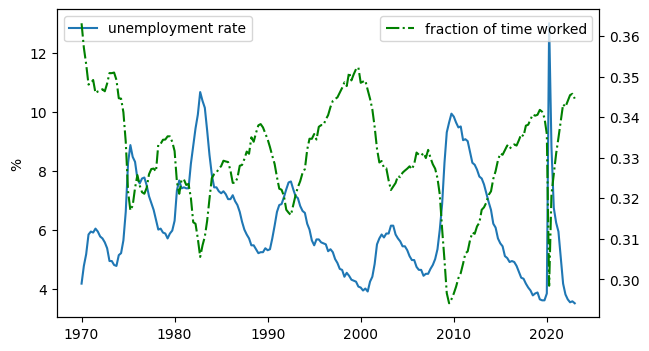

In [12]:
fig, ax1 = plt.subplots(figsize=(7,4))

ax2 = ax1.twinx()
ax1.plot(df_samp.date, df_samp.unrate,label='unemployment rate')
ax1.set_ylabel('%')
ax1.legend()

ax2.plot(df_samp.date, df_samp.l,'g-.',label='fraction of time worked')
ax2.legend()
plt.savefig('out/unrate_and_hours.pdf')
plt.show()

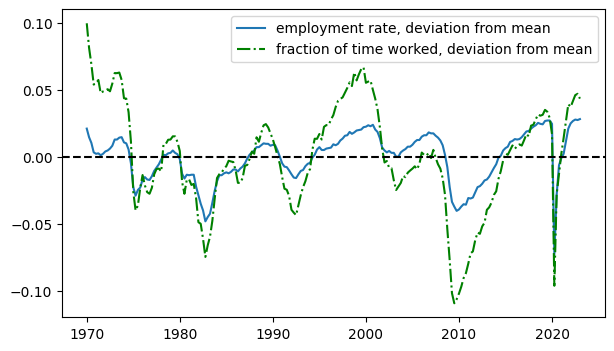

In [13]:
plt.figure(figsize=(7,4))
plt.plot(df_samp.date, (100-df_samp.unrate)/(100-df_samp.unrate).mean() - 1,label='employment rate, deviation from mean')
plt.plot(df_samp.date, df_samp.l/df_samp.l.mean() - 1,'g-.',label='fraction of time worked, deviation from mean')
plt.axhline(0,color='k',linestyle='--')
plt.legend()
plt.savefig('out/unrate_and_hours_pdev.pdf')
plt.show()

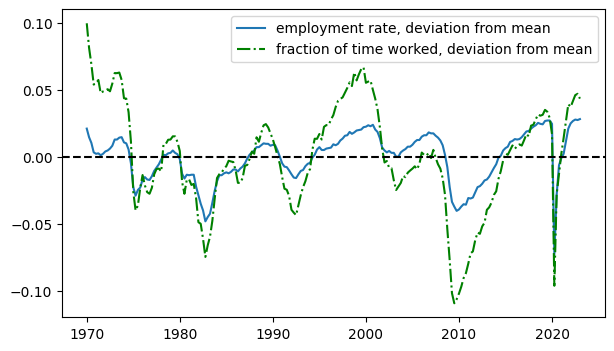

In [14]:
plt.figure(figsize=(7,4))
plt.plot(df_samp.date, (100-df_samp.unrate)/(100-df_samp.unrate).mean() - 1,label='employment rate, deviation from mean')
plt.plot(df_samp.date, df_samp.l/df_samp.l.mean() - 1,'g-.',label='fraction of time worked, deviation from mean')
plt.axhline(0,color='k',linestyle='--')
plt.legend()
plt.savefig('out/unrate_and_hours_pdev.pdf')
plt.show()

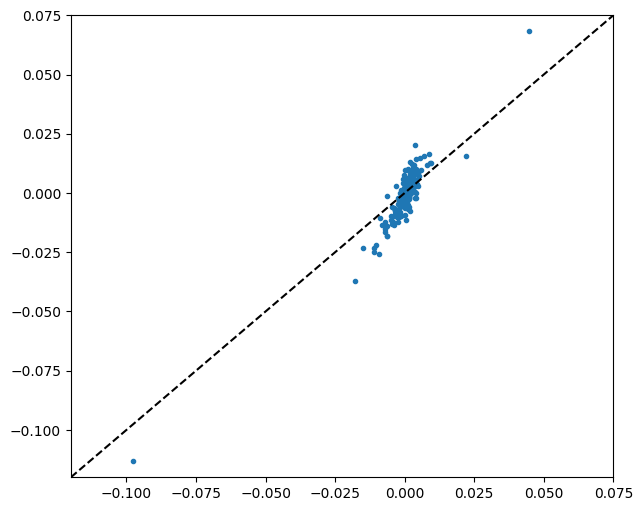

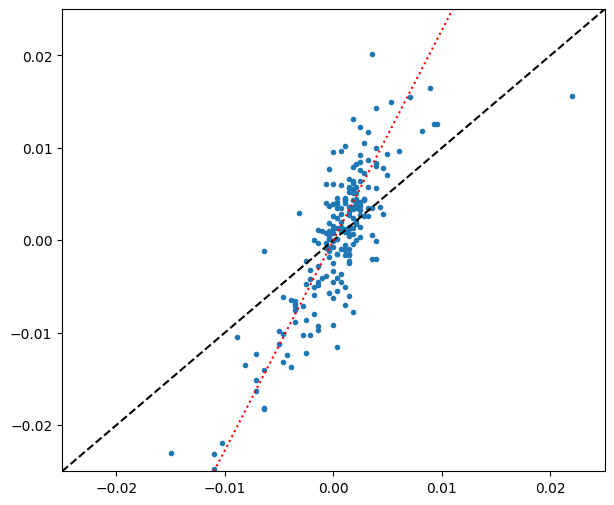

In [15]:
df_samp['l_dev'] = df_samp.l/df_samp.l.mean() - 1
df_samp['u_dev'] = (100-df_samp.unrate)/(100-df_samp.unrate).mean() - 1

plt.figure(figsize=(7,6))
plt.plot(df_samp['u_dev'] - df_samp['u_dev'].shift(1),df_samp['l_dev'] - df_samp['l_dev'].shift(1),'.')
plt.plot([-.12,.075],[-.12,.075],'k--')
plt.ylim([-.12,.075])
plt.xlim([-.12,.075])

plt.show()

plt.figure(figsize=(7,6))
plt.plot(df_samp['u_dev'] - df_samp['u_dev'].shift(1),df_samp['l_dev'] - df_samp['l_dev'].shift(1),'.')
plt.plot([-.025,.025],[-.025,.025],'k--')
plt.plot([-.011,.011],[-.025,.025],'r:')
plt.ylim([-.025,.025])
plt.xlim([-.025,.025])

plt.show()